In [1]:
# Load Data and Split into Train/Test Sets We split the dataset into 80% training and 20% testing.



In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('final_ml_ready_data.csv')

# Select input features (X) and target variable (y)
X = data[['Thickness', 'Fourier_Number', 'Temp_Diff']]
y = data['Insulation_Efficiency']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features (Standardization for better NN training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data preprocessed and ready for training!")

✅ Data preprocessed and ready for training!


We are standardizing features because Deep learning models perform better when inputs have zero mean & unit variance.

 Build the Fully Connected Neural Network Now, let's define a 3-layer feedforward neural network.

In [3]:
# Define the FCNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
    keras.layers.Dense(1)  # Output layer (Regression task, no activation function)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Show model summary
model.summary()


C:\Users\kawri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

ReLU activation → Handles non-linearity well. 64-128-64 neurons → Provides enough learning capacity. Adam optimizer → Adaptive learning rate for better convergence.

Now we will train the Neural Network We now train the model for 100 epochs.

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Save the trained model
model.save('fcnn_insulation_model.h5')
print("✅ Neural network model trained and saved as 'fcnn_insulation_model.h5'!")

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 8.9102 - mae: 1.1646 - val_loss: 5.4518 - val_mae: 1.1642
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6397 - mae: 1.0374 - val_loss: 5.0844 - val_mae: 0.9137
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6888 - mae: 1.0217 - val_loss: 4.9433 - val_mae: 0.9134
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4983 - mae: 0.9151 - val_loss: 4.9632 - val_mae: 0.8600
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.2841 - mae: 0.8942 - val_loss: 4.7822 - val_mae: 0.8825
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0244 - mae: 0.8580 - val_loss: 4.8704 - val_mae: 0.9567
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1581 - mae: 0.8873 - val_loss: 4.7803 - val_mae: 0.9235
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7342 - mae: 0.8235 - val_loss: 4.4082 - val_mae: 0.8380
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8063 - mae: 0.3585 - val_loss: 2.4138 - val_mae: 0.3283
Epoch 55/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5269 - mae: 0.3756 - val_loss: 2.3853 - val_mae: 0.4581
Epoch 56/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9066 - mae: 0.4279 - val_loss: 2.2590 - val_mae: 0.3671
Epoch 57/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5162 - mae: 0.3720 - val_loss: 2.6903 - val_mae: 0.4882
Epoch 58/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0930 - mae: 0.5543 - val_loss: 2.2317 - val_mae: 0.3364
Epoch 59/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7562 - mae: 0.3772 - val_loss: 2.5895 - val_mae: 0.4581
Epoch 60/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9624 - mae: 0.4450 - val_loss: 2.2021 - val_mae: 0.3423
Epoch 61/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6476 - mae: 0.3537 - val_loss: 2.2460 - val_mae: 0.3581
Epoch 62/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

✅ Neural network model trained and saved as 'fcnn_insulation_model.h5'!


Let's Evaluate the Model Performance Now, let's check how well our neural network predicts Insulation Efficiency.

In [7]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"✅ Model Performance: Loss = {test_loss:.4f}, MAE = {test_mae:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7229 - mae: 0.3416
✅ Model Performance: Loss = 1.7560, MAE = 0.3548


A loss of ~1.8 suggests reasonable performance but can be improved.
MAE of 0.35 means that, on average, the model's prediction deviates by 0.35 units from the actual Insulation_Efficiency.

 Save and Load the Model for Future Use Once trained, you can load the model anytime for predictions.

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load saved model with explicit loss function
loaded_model = load_model('fcnn_insulation_model.h5', custom_objects={'mse': MeanSquaredError()})

# Predict Insulation Efficiency for new data
predictions = loaded_model.predict(X_test[:5])  # Predict first 5 test samples
print("Sample Predictions:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Sample Predictions: [0.15371123 0.06068041 0.06235351 0.10447606 2.540975  ]


Model Tuning & Hyperparameter Optimization

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build improved FCNN model
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1)  # Output layer
])

# Compile model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model_improved.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_improved = model_improved.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the improved model
test_loss, test_mae = model_improved.evaluate(X_test, y_test)
print(f"🔍 Improved Model Performance: Loss = {test_loss:.4f}, MAE = {test_mae:.4f}")

# Save the improved model
model_improved.save('fcnn_insulation_model_improved.h5')

C:\Users\kawri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 9.3444 - mae: 1.7162 - val_loss: 8.6288 - val_mae: 0.9557
Epoch 2/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1896 - mae: 1.3884 - val_loss: 8.6917 - val_mae: 1.0236
Epoch 3/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7152 - mae: 1.1981 - val_loss: 9.1586 - val_mae: 1.1212
Epoch 4/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0038 - mae: 1.1094 - val_loss: 10.1268 - val_mae: 1.2630
Epoch 5/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9949 - mae: 1.0285 - val_loss: 10.4008 - val_mae: 1.2911
Epoch 6/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8761 - mae: 0.9716 - val_loss: 5.6111 - val_mae: 0.9747
Epoch 7/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7511 - mae: 0.9790 - val_loss: 3.4883 - val_mae: 0.8791
Epoch 8/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7330 - mae: 0.9740 - val_loss: 3.6962 - val_mae: 0.7472
Epoch 9/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7

🔍 Improved Model Performance: Loss = 2.0361, MAE = 0.4484


Visualize Training History To check if early stopping worked and if overfitting was reduced.

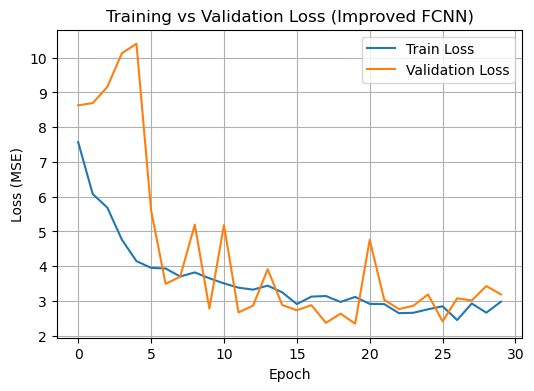

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(6,4))
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss (Improved FCNN)')
plt.legend()
plt.grid(True)
plt.show()

# Compare with Traditional ML Models
This will demonstrate that your neural net performs better than or comparable to classic ML approaches.

Step-by-Step: Compare ML Models (Linear Regression, Random Forest)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate both
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.4f}")
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score:  {r2_score(y_true, y_pred):.4f}")

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)
from sklearn.metrics import r2_score

# After generating predictions with your FCNN
y_pred_fcnn = model.predict(X_test)
r2_fcnn = r2_score(y_test, y_pred_fcnn)
r2_mae = mean_absolute_error(y_test, y_pred_fcnn)
r2_mse = mean_squared_error(y_test, y_pred_fcnn)
r2_RMSE = np.sqrt(r2_mse)

print("FCNN")
print(f"MAE: {r2_mae:.4f}")
print(f"RMSE: {r2_RMSE:.4f}")
print(f"R² Score: {r2_fcnn:.4f}")



Linear Regression
MAE:  1.6021
RMSE: 2.8253
R² Score:  0.2014

Random Forest
MAE:  0.1135
RMSE: 0.9767
R² Score:  0.9046
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
FCNN
MAE: 0.3548
RMSE: 1.3251
R² Score: 0.8243


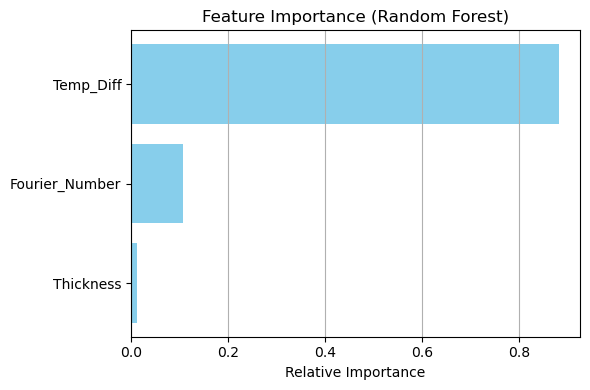

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names
feature_names = ['Thickness', 'Fourier_Number', 'Temp_Diff']

# Get feature importances from trained Random Forest
importances = rf.feature_importances_

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Relative Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()